In [14]:
# ==========================================
# EV Maintenance & Resale Prediction Project
# Complete Library Import Section (Fixed)
# ==========================================

!pip install geopandas folium lime shap xgboost plotly seaborn statsmodels --quiet

# --- 1. CORE UTILITIES ---
import os
import sys
import math
import random
import time
import warnings
warnings.filterwarnings("ignore")   # suppress unnecessary warnings

from pathlib import Path
from datetime import datetime

# --- 2. DATA HANDLING & COMPUTATION ---
import pandas as pd
import numpy as np
from scipy import stats

# --- 3. VISUALIZATION & ANALYTICS ---
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# --- 4. MACHINE LEARNING & PREPROCESSING ---
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# --- 5. REGRESSION MODELS (Maintenance & Resale Prediction) ---
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# --- 6. EVALUATION METRICS ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# --- 7. FEATURE SELECTION & INSIGHTS ---
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.inspection import permutation_importance

# --- 8. ADVANCED STATISTICS / ECONOMETRIC MODELLING ---
import statsmodels.api as sm

# --- 9. EXPLAINABLE AI / INTERPRETABILITY ---
import shap
from shap import TreeExplainer
from lime import lime_tabular

# --- 10. TIME SERIES / TEMPORAL (optional future ownership horizon modeling) ---
import datetime as dt

# --- 11. GEOSPATIAL (optional visualization by region) ---
import geopandas as gpd
import folium

# --- 12. RANDOM SEED CONFIGURATION ---
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

print("All essential libraries loaded successfully for EV Maintenance & Resale Prediction Project.")


All essential libraries loaded successfully for EV Maintenance & Resale Prediction Project.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:

# Load the EV dataset and view top 10 rows


# Define dataset path (adjust if necessary)
DATA_PATH = Path(r"C:\Users\Lohith\Downloads\electric_vehicle_analytics.csv")

# Load dataset
df = pd.read_csv(DATA_PATH)

# Confirm successful load
print(" Dataset loaded successfully.")
print(f"Shape (rows, columns): {df.shape}\n")

# Display top 10 rows
print("Top 10 rows of the dataset:")
display(df.head(10))


 Dataset loaded successfully.
Shape (rows, columns): (3000, 25)

Top 10 rows of the dataset:


,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033
5,6,Hyundai,Ioniq 5,2021,North America,Sedan,68.1,81.8,312,14.4,...,235,5.83,-4.2,Commercial,16.12,334,700,0.25,601.05,19412
6,7,Ford,F-150 Lightning,2016,Asia,Sedan,38.6,81.1,206,170.2,...,176,8.14,28.0,Fleet,24.80,1441,1002,0.29,1175.18,13983
7,8,Audi,e-tron,2021,Australia,Sedan,33.6,91.3,141,116.0,...,133,9.40,2.5,Fleet,13.45,948,2178,0.28,530.00,14121
8,9,Mercedes,EQS,2018,Europe,Sedan,114.9,88.0,619,221.4,...,237,4.71,34.6,Personal,0.92,1554,2163,0.30,38.91,31897
9,10,Hyundai,Ioniq 5,2023,North America,SUV,58.6,73.3,261,113.1,...,138,6.65,24.6,Personal,23.30,1457,1183,0.15,387.28,20833


In [17]:

# Data Quality Check: Missing Values, Duplicates, Data Types, Summary

df["Year"] = pd.to_datetime(df["Year"].astype(int), format="%Y")

# Check for missing values
print(" Missing Values per Column:\n")
print(df.isna().sum().sort_values(ascending=False))
print("\n")

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f" Number of Duplicate Rows: {duplicate_count}\n")

# Check data types
print(" Data Types Summary:\n")
print(df.dtypes)
print("\n")

# Statistical summary for numeric columns
print(" Statistical Summary (Numeric Columns):\n")
display(df.describe().T)


 Missing Values per Column:

Vehicle_ID                          0
Make                                0
Model                               0
Year                                0
Region                              0
Vehicle_Type                        0
Battery_Capacity_kWh                0
Battery_Health_%                    0
Range_km                            0
Charging_Power_kW                   0
Charging_Time_hr                    0
Charge_Cycles                       0
Energy_Consumption_kWh_per_100km    0
Mileage_km                          0
Avg_Speed_kmh                       0
Max_Speed_kmh                       0
Acceleration_0_100_kmh_sec          0
Temperature_C                       0
Usage_Type                          0
CO2_Saved_tons                      0
Maintenance_Cost_USD                0
Insurance_Cost_USD                  0
Electricity_Cost_USD_per_kWh        0
Monthly_Charging_Cost_USD           0
Resale_Value_USD                    0
dtype: int64


 Numbe

,count,mean,min,25%,50%,75%,max,std
Vehicle_ID,3000.0,1500.5,1.0,750.75,1500.5,2250.25,3000.0,866.169729
Year,3000,2019-07-02 13:50:24,2015-01-01 00:00:00,2017-01-01 00:00:00,2020-01-01 00:00:00,2022-01-01 00:00:00,2024-01-01 00:00:00,NaN
Battery_Capacity_kWh,3000.0,74.8101,30.0,53.0,74.85,96.9,120.0,25.734079
Battery_Health_%,3000.0,85.03,70.0,77.775,85.25,92.3,100.0,8.589526
Range_km,3000.0,374.414667,121.0,260.0,371.0,476.25,713.0,137.184112
Charging_Power_kW,3000.0,129.301,11.1,70.9,126.7,187.975,250.0,68.742745
Charging_Time_hr,3000.0,1.20357,0.14,0.46,0.72,1.2925,12.14,1.421866
Charge_Cycles,3000.0,1107.009667,200.0,674.75,1116.0,1535.25,1997.0,510.83459
Energy_Consumption_kWh_per_100km,3000.0,18.58974,12.0,15.32,18.7,21.83,24.99,3.767421
Mileage_km,3000.0,125209.685667,5046.0,65140.5,125965.0,184764.75,249987.0,70465.774772


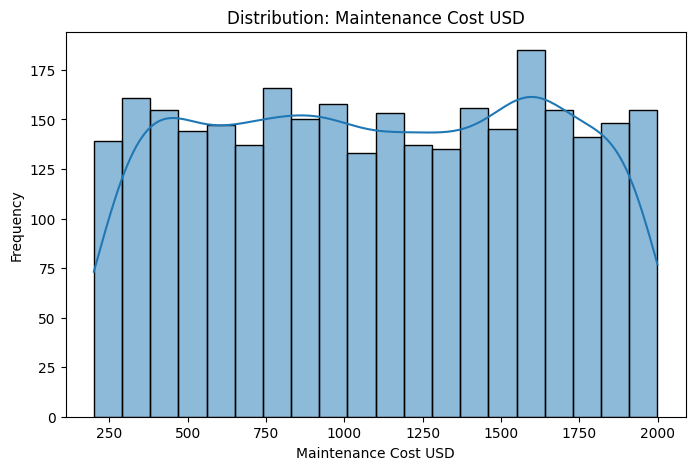

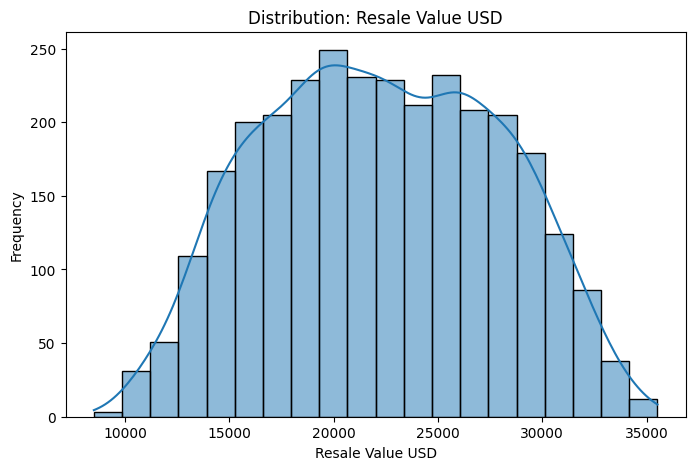

In [18]:
# --- Step 1: Target Distributions ---
import matplotlib.pyplot as plt
import seaborn as sns

targets = ["Maintenance_Cost_USD", "Resale_Value_USD"]

for col in targets:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f"Distribution: {col.replace('_',' ')}")
        plt.xlabel(col.replace('_',' '))
        plt.ylabel("Frequency")
        plt.show()


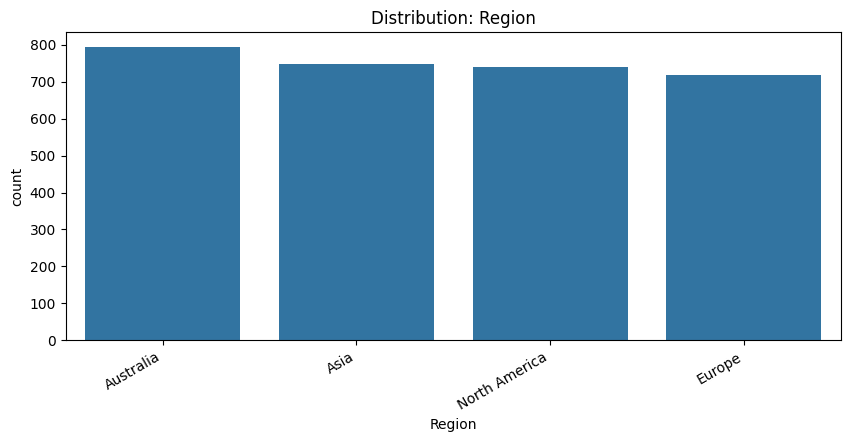

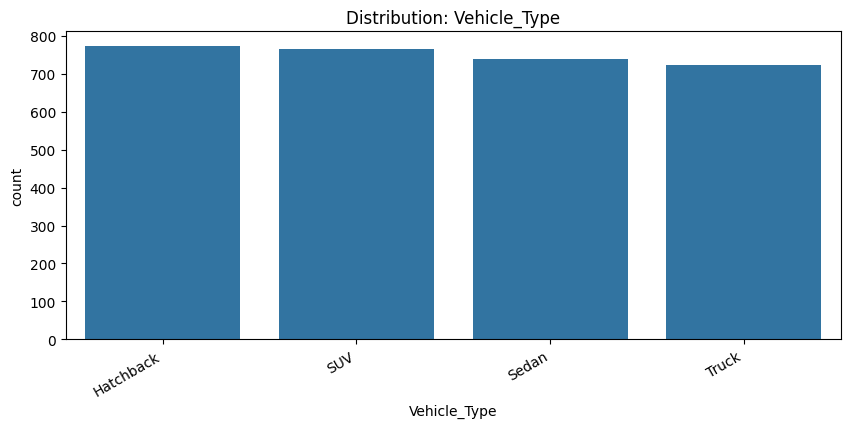

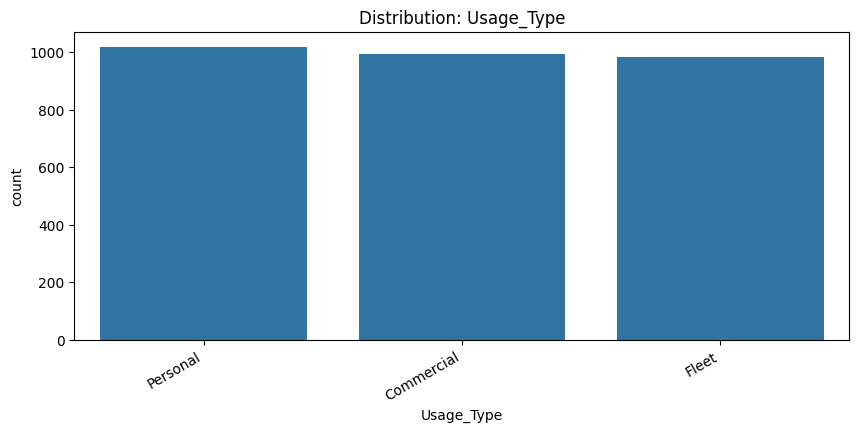

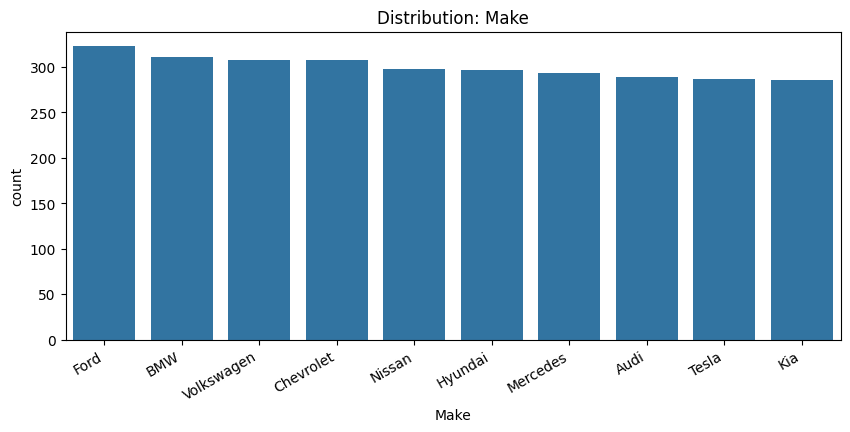

In [19]:
#  Categorical Distributions ---
import seaborn as sns
import matplotlib.pyplot as plt

cats = [c for c in ["Region", "Vehicle_Type", "Usage_Type", "Make"] if c in df.columns]

for c in cats:
    # limit very long x-axes
    order = df[c].value_counts().index[:20]
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=c, order=order)
    plt.title(f"Distribution: {c}")
    plt.xticks(rotation=30, ha="right")
    plt.show()


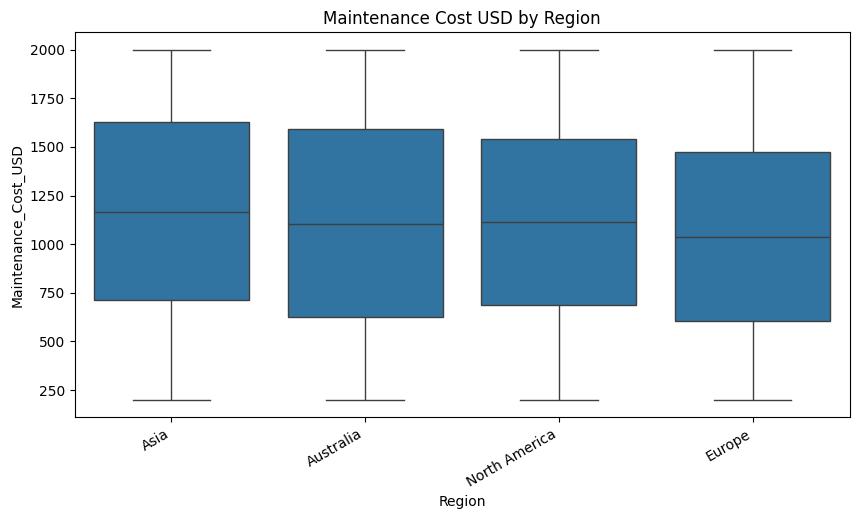

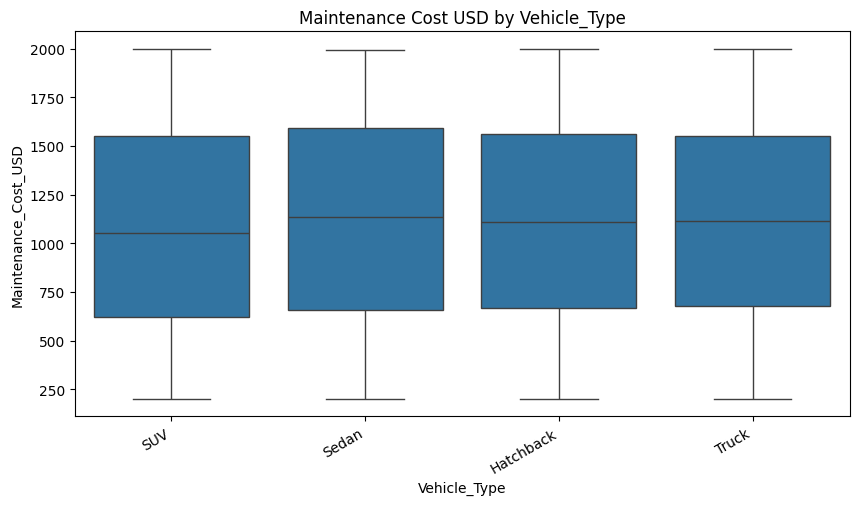

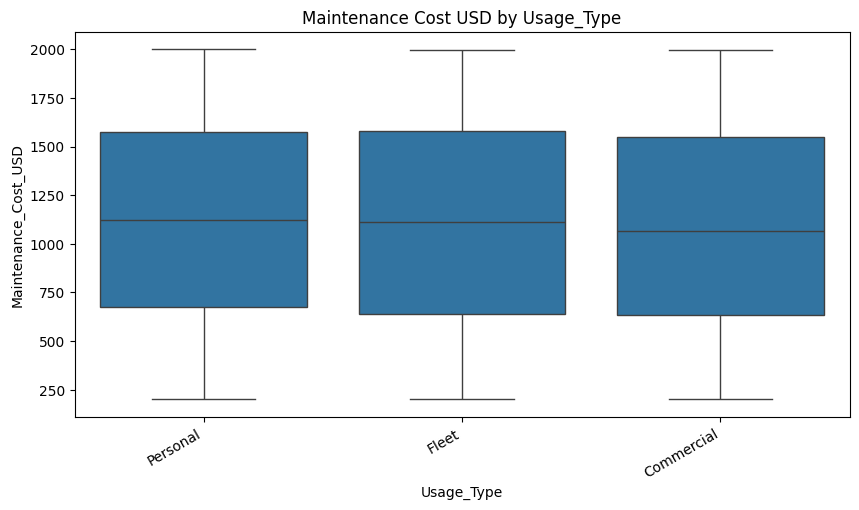

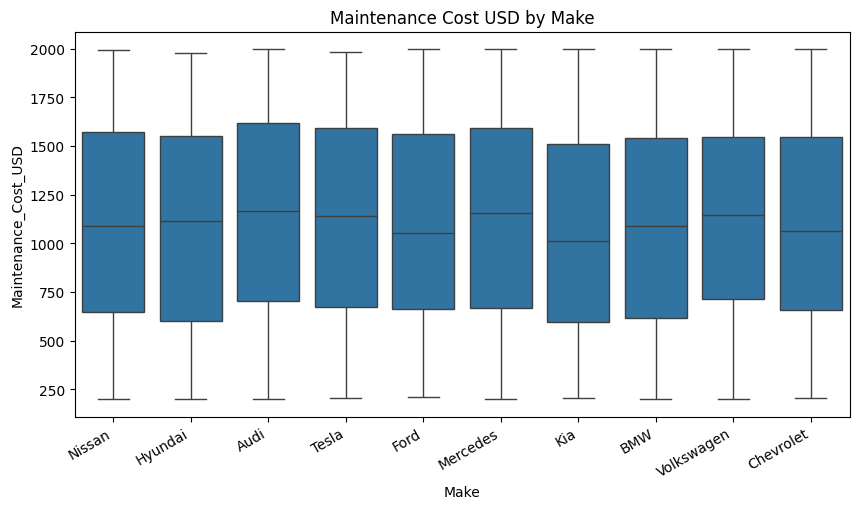

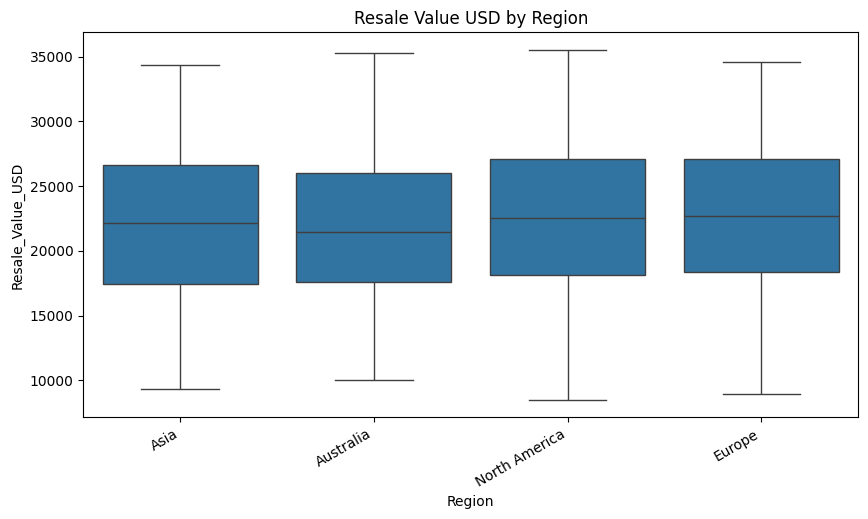

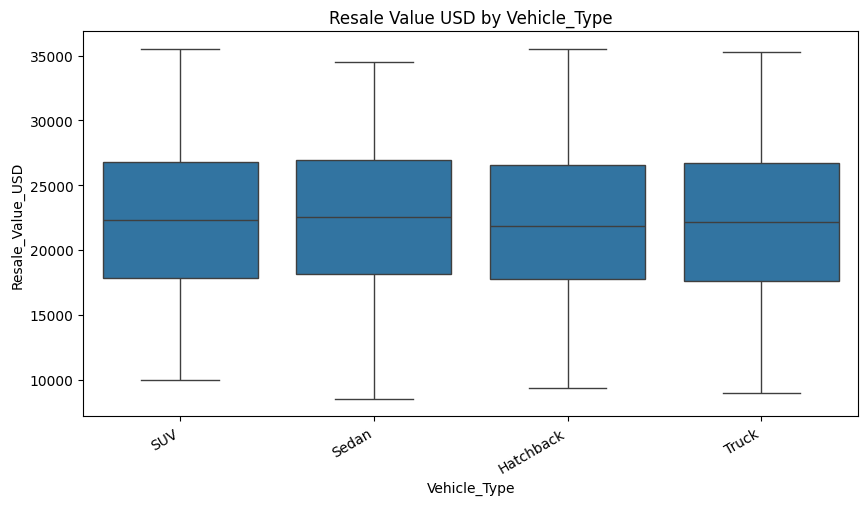

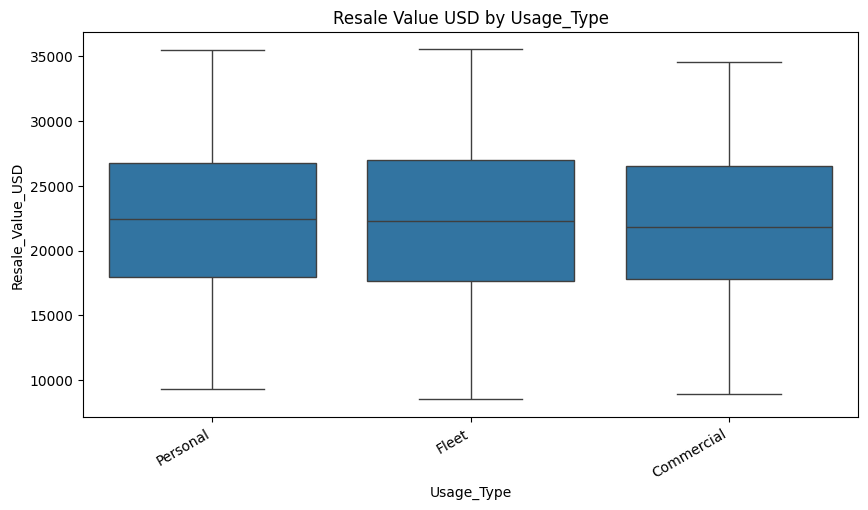

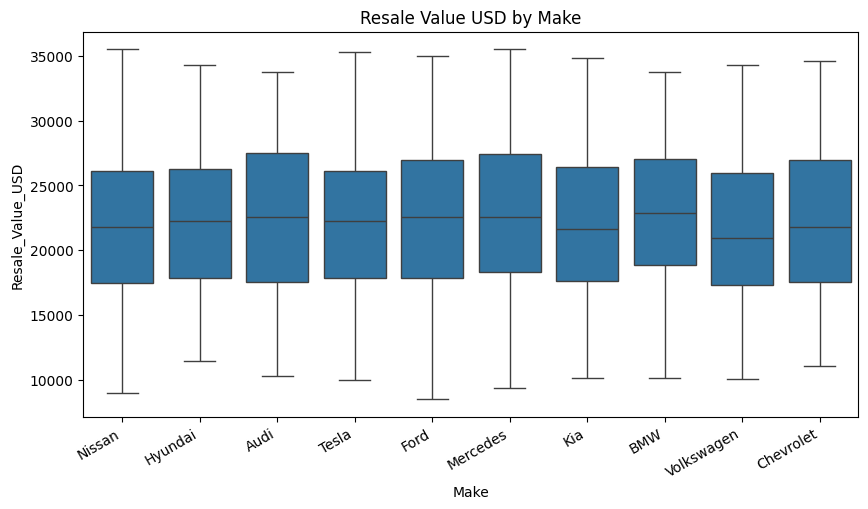

In [20]:
#  Targets by Category (Boxplots) ---
import seaborn as sns
import matplotlib.pyplot as plt

targets = [t for t in ["Maintenance_Cost_USD", "Resale_Value_USD"] if t in df.columns]
cats = [c for c in ["Region", "Vehicle_Type", "Usage_Type", "Make"] if c in df.columns]

for t in targets:
    for c in cats:
        if df[c].nunique() > 25:  # skip overly long categories
            continue
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=c, y=t)
        plt.title(f"{t.replace('_',' ')} by {c}")
        plt.xticks(rotation=30, ha="right")
        plt.show()


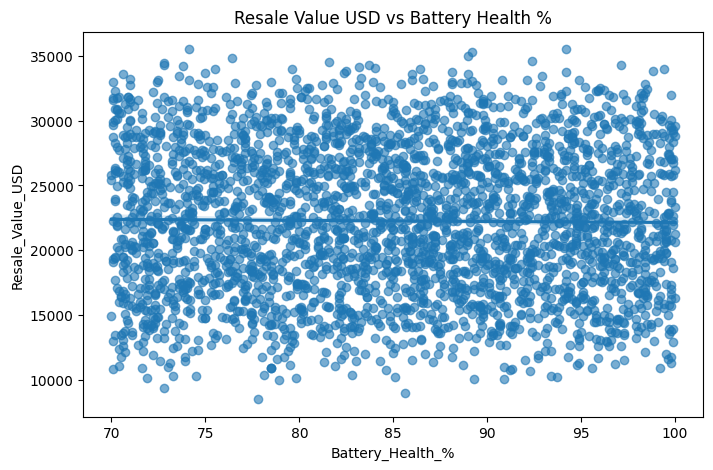

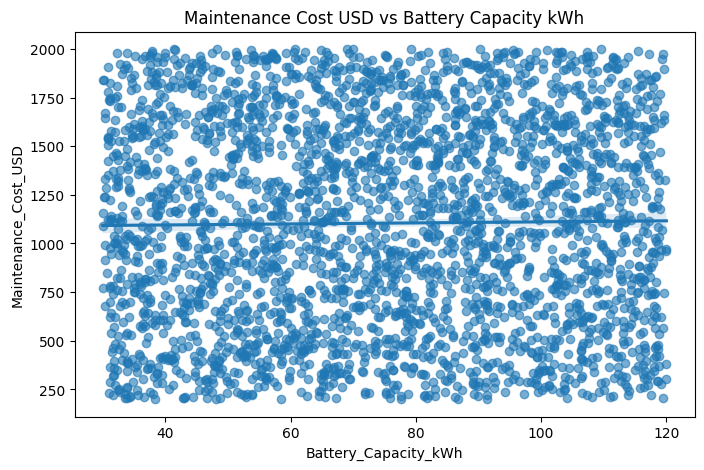

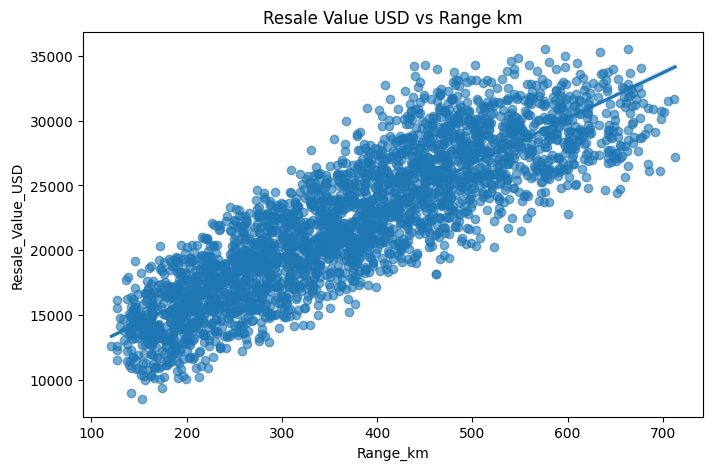

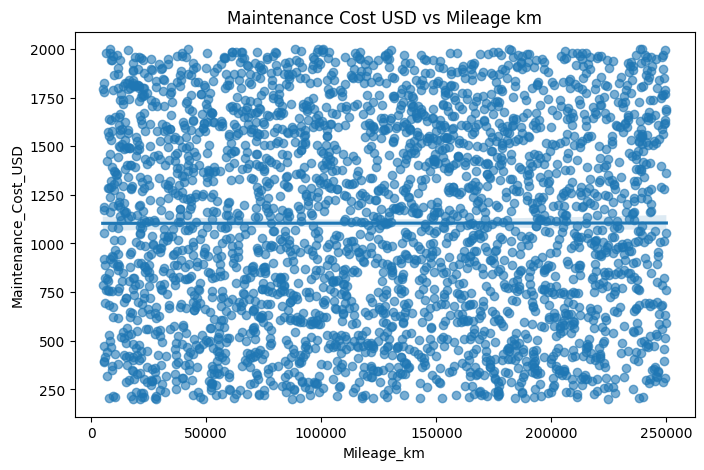

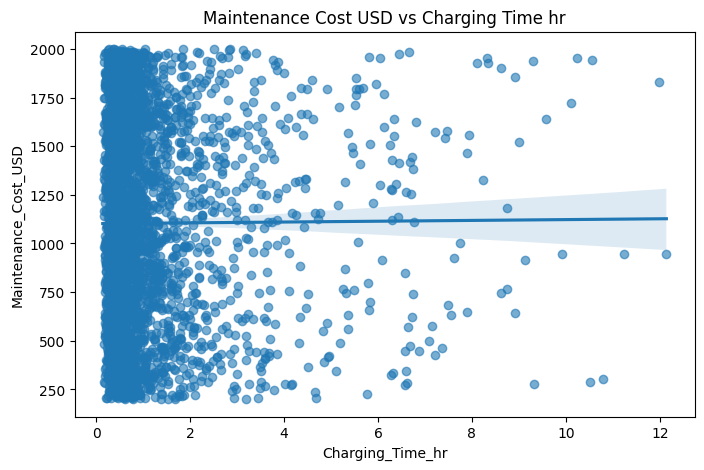

In [21]:
#  Technical vs Financial (Regplots) ---
pairs = [
    ("Battery_Health_%", "Resale_Value_USD"),
    ("Battery_Capacity_kWh", "Maintenance_Cost_USD"),
    ("Range_km", "Resale_Value_USD"),
    ("Mileage_km", "Maintenance_Cost_USD"),
    ("Charging_Time_hr", "Maintenance_Cost_USD"),
]

import seaborn as sns
import matplotlib.pyplot as plt

for x, y in pairs:
    if x in df.columns and y in df.columns:
        plt.figure(figsize=(8, 5))
        sns.regplot(data=df, x=x, y=y, scatter_kws={'alpha':0.6})
        plt.title(f"{y.replace('_',' ')} vs {x.replace('_',' ')}")
        plt.show()


In [22]:
#  Regional Summary (Business View) ---
import pandas as pd

if {"Region","Maintenance_Cost_USD","Resale_Value_USD"}.issubset(df.columns):
    regional = (
        df.groupby("Region")[["Maintenance_Cost_USD","Resale_Value_USD"]]
          .mean()
          .reset_index()
          .sort_values("Resale_Value_USD", ascending=False)
    )
    print("Average Maintenance & Resale by Region:")
    display(regional)


Average Maintenance & Resale by Region:


,Region,Maintenance_Cost_USD,Resale_Value_USD
3,North America,1107.216216,22586.341892
2,Europe,1054.917942,22529.246175
0,Asia,1150.658635,22077.799197
1,Australia,1102.303526,21872.263224


In [23]:
#  Interactive Regional Bars ---
import plotly.express as px

if "regional" in locals():
    fig = px.bar(
        regional,
        x="Region",
        y=["Maintenance_Cost_USD", "Resale_Value_USD"],
        barmode="group",
        title="Average Maintenance vs Resale Value by Region"
    )
    fig.update_layout(title_x=0.5)
    fig.show()


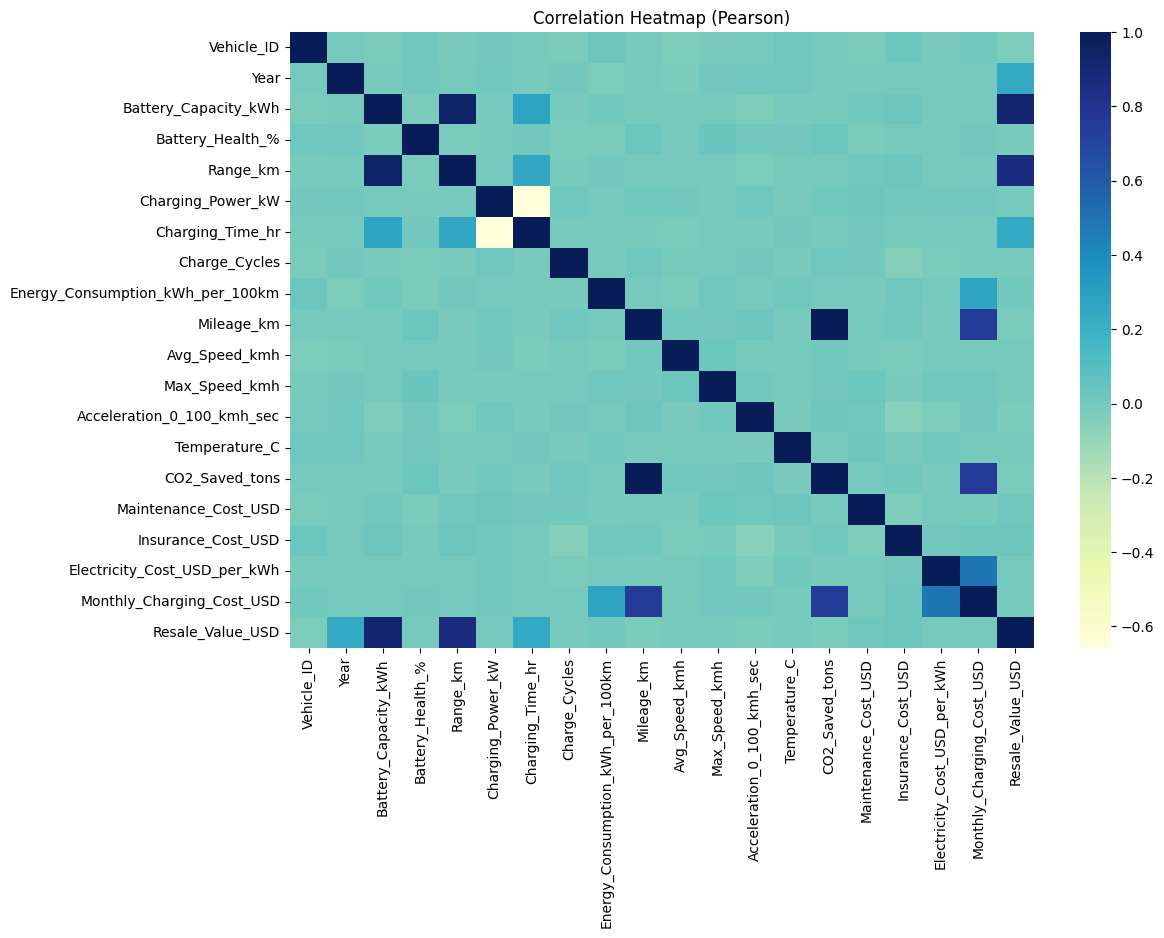

In [24]:
df_corr = df.copy()

#  Convert Year datetime → numeric year
df_corr["Year"] = df_corr["Year"].dt.year

# numeric columns 
num_df = df_corr.select_dtypes(include=[np.number])

#  Compute correlation matrix
corr_matrix = num_df.corr()

#  Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=False)
plt.title("Correlation Heatmap (Pearson)")
plt.show()

Numeric features: ['Vehicle_ID', 'Battery_Capacity_kWh', 'Battery_Health_%', 'Range_km', 'Charging_Power_kW', 'Charging_Time_hr', 'Charge_Cycles', 'Energy_Consumption_kWh_per_100km', 'Mileage_km', 'Avg_Speed_kmh', 'Max_Speed_kmh', 'Acceleration_0_100_kmh_sec', 'Temperature_C', 'CO2_Saved_tons', 'Maintenance_Cost_USD', 'Insurance_Cost_USD', 'Electricity_Cost_USD_per_kWh', 'Monthly_Charging_Cost_USD', 'Year_year']
Categorical features: ['Make', 'Model', 'Region', 'Vehicle_Type', 'Usage_Type']

 Skipping multicollinearity removal — keeping ALL variables.

Shape after encoding: (3000, 58)


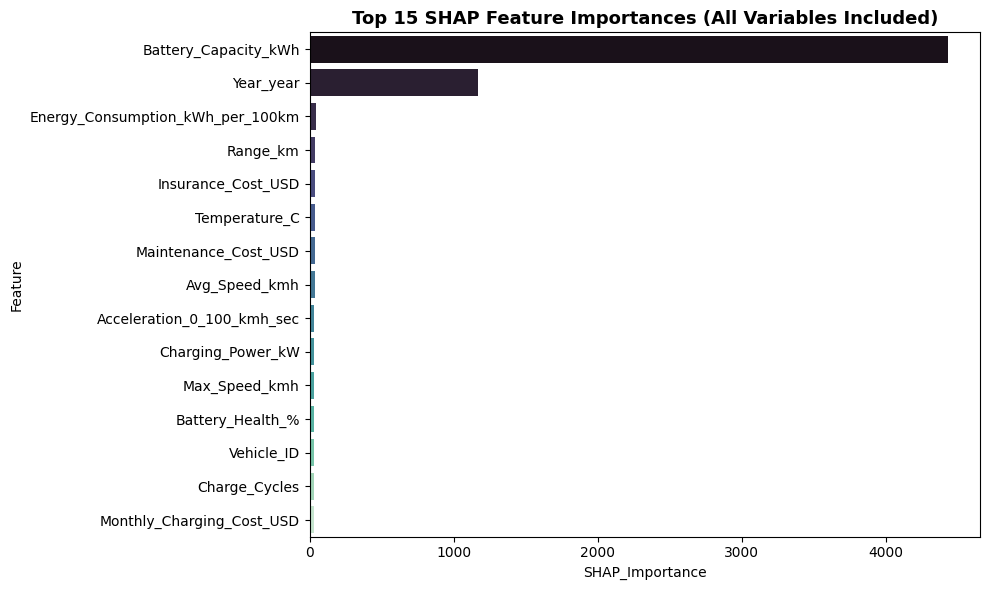

,Feature,SHAP_Importance
1,Battery_Capacity_kWh,4434.098469
18,Year_year,1169.994671
7,Energy_Consumption_kWh_per_100km,46.057487
3,Range_km,40.823472
15,Insurance_Cost_USD,40.723543
12,Temperature_C,39.657353
14,Maintenance_Cost_USD,38.467618
9,Avg_Speed_kmh,36.820361
11,Acceleration_0_100_kmh_sec,34.139549
4,Charging_Power_kW,33.318156


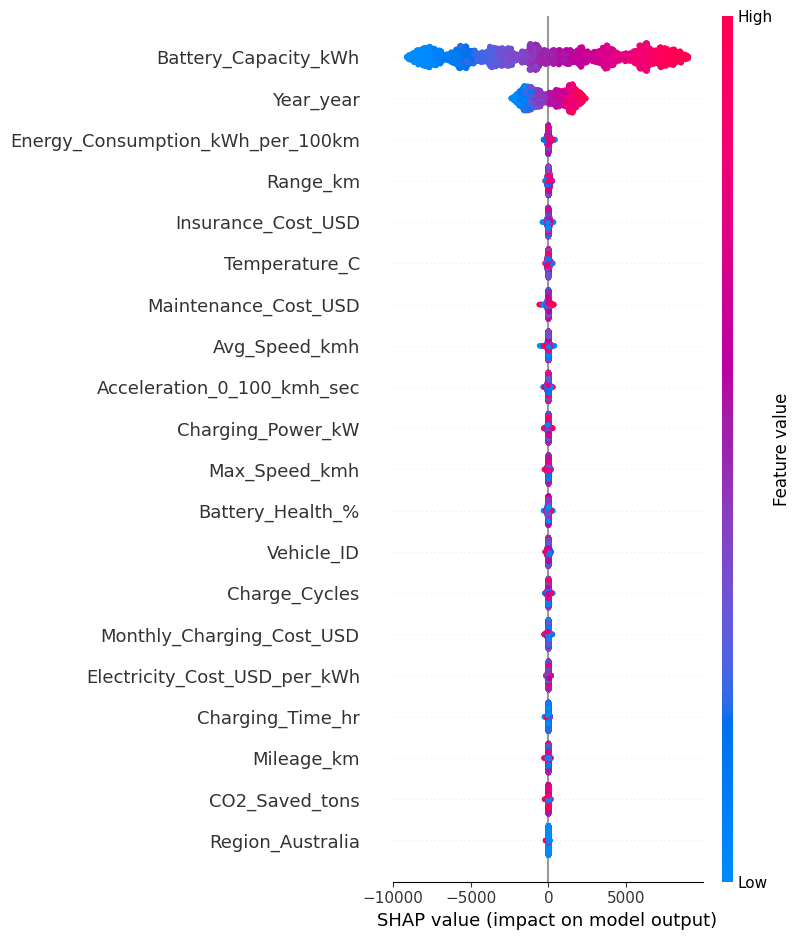

In [25]:
import shap
# --- 0. Init SHAP JS ---
shap.initjs()

# --- 1. Define Target ---
TARGET = 'Resale_Value_USD'

# Features + target
X = df.drop(columns=[TARGET])
y = df[TARGET]

# --- 1A. Convert datetime columns to YEAR only ---
X_model = X.copy()

datetime_cols = X_model.select_dtypes(include=["datetime64[ns]", "datetime64[ns, UTC]"]).columns

for col in datetime_cols:
    X_model[col + "_year"] = X_model[col].dt.year.astype("float64")
    X_model = X_model.drop(columns=[col])

# --- 2. Separate numeric & categorical (NO DROPPING ANYTHING) ---
numeric_cols = X_model.select_dtypes(include=[np.number]).columns
categorical_cols = X_model.select_dtypes(include=['object', 'category']).columns

print("Numeric features:", list(numeric_cols))
print("Categorical features:", list(categorical_cols))

# --- 3. DO NOT DROP ANY HIGHLY CORRELATED FEATURES ---
# (Removed threshold-based feature dropping entirely)
print("\n Skipping multicollinearity removal — keeping ALL variables.\n")

# --- 4. One-Hot Encode ALL Categorical Features ---
X_encoded = pd.get_dummies(
    X_model,
    columns=categorical_cols,
    drop_first=True
)

print("Shape after encoding:", X_encoded.shape)

# --- 5. Train Random Forest Model ---
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_encoded, y)

# --- 6. SHAP Explainer ---
explainer = shap.TreeExplainer(rf_model)
X_sample = X_encoded        # Use full dataset
shap_values = explainer.shap_values(X_sample)

# --- 7. SHAP Feature Importance (ALL Features) ---
shap_importance = pd.DataFrame({
    'Feature': X_sample.columns,
    'SHAP_Importance': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=shap_importance.head(15),
    x="SHAP_Importance",
    y="Feature",
    palette="mako"
)
plt.title("Top 15 SHAP Feature Importances (All Variables Included)", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()

display(shap_importance.head(15))

# --- 8. SHAP Summary Plot (ALL FEATURES) ---
shap.summary_plot(shap_values, X_sample, plot_type="dot")


 TRAIN PERFORMANCE COMPARISON:


,Model,MAE,RMSE,R² Score
1,Random Forest,1333.655179,1616.505686,0.916888
2,Gradient Boosting,1733.972742,2133.032055,0.855288
0,Linear Regression,2280.515010,2803.421636,0.750031
3,SVR,4499.384268,5329.725412,0.096519



 TEST PERFORMANCE COMPARISON:


,Model,MAE,RMSE,R² Score
2,Gradient Boosting,2172.593566,2702.871611,0.761650
1,Random Forest,2229.640892,2779.796964,0.747890
0,Linear Regression,2310.831499,2875.216789,0.730285
3,SVR,4398.894520,5280.167788,0.090380



 Best Model (Test RMSE): Gradient Boosting


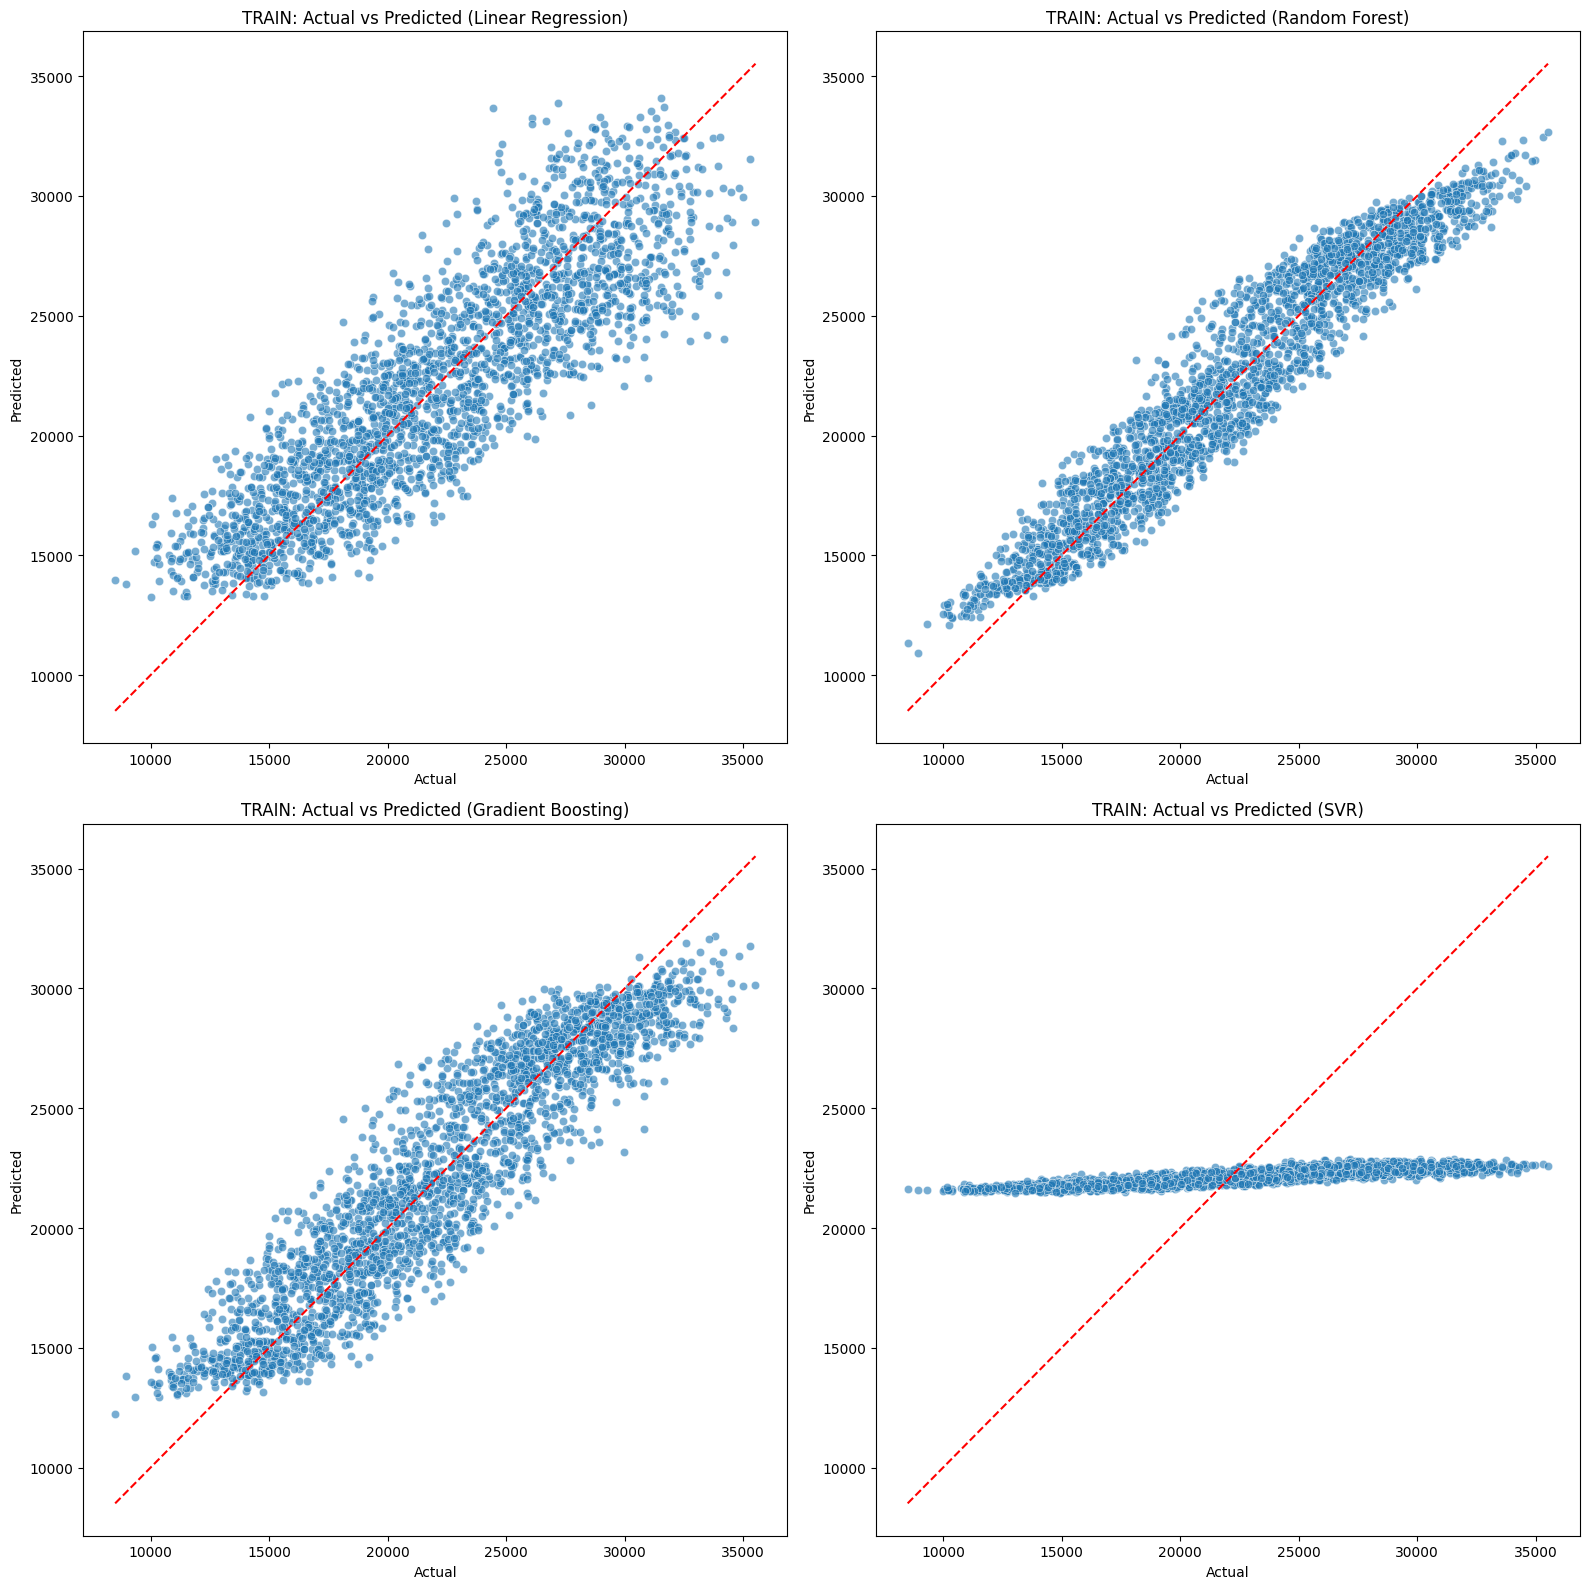

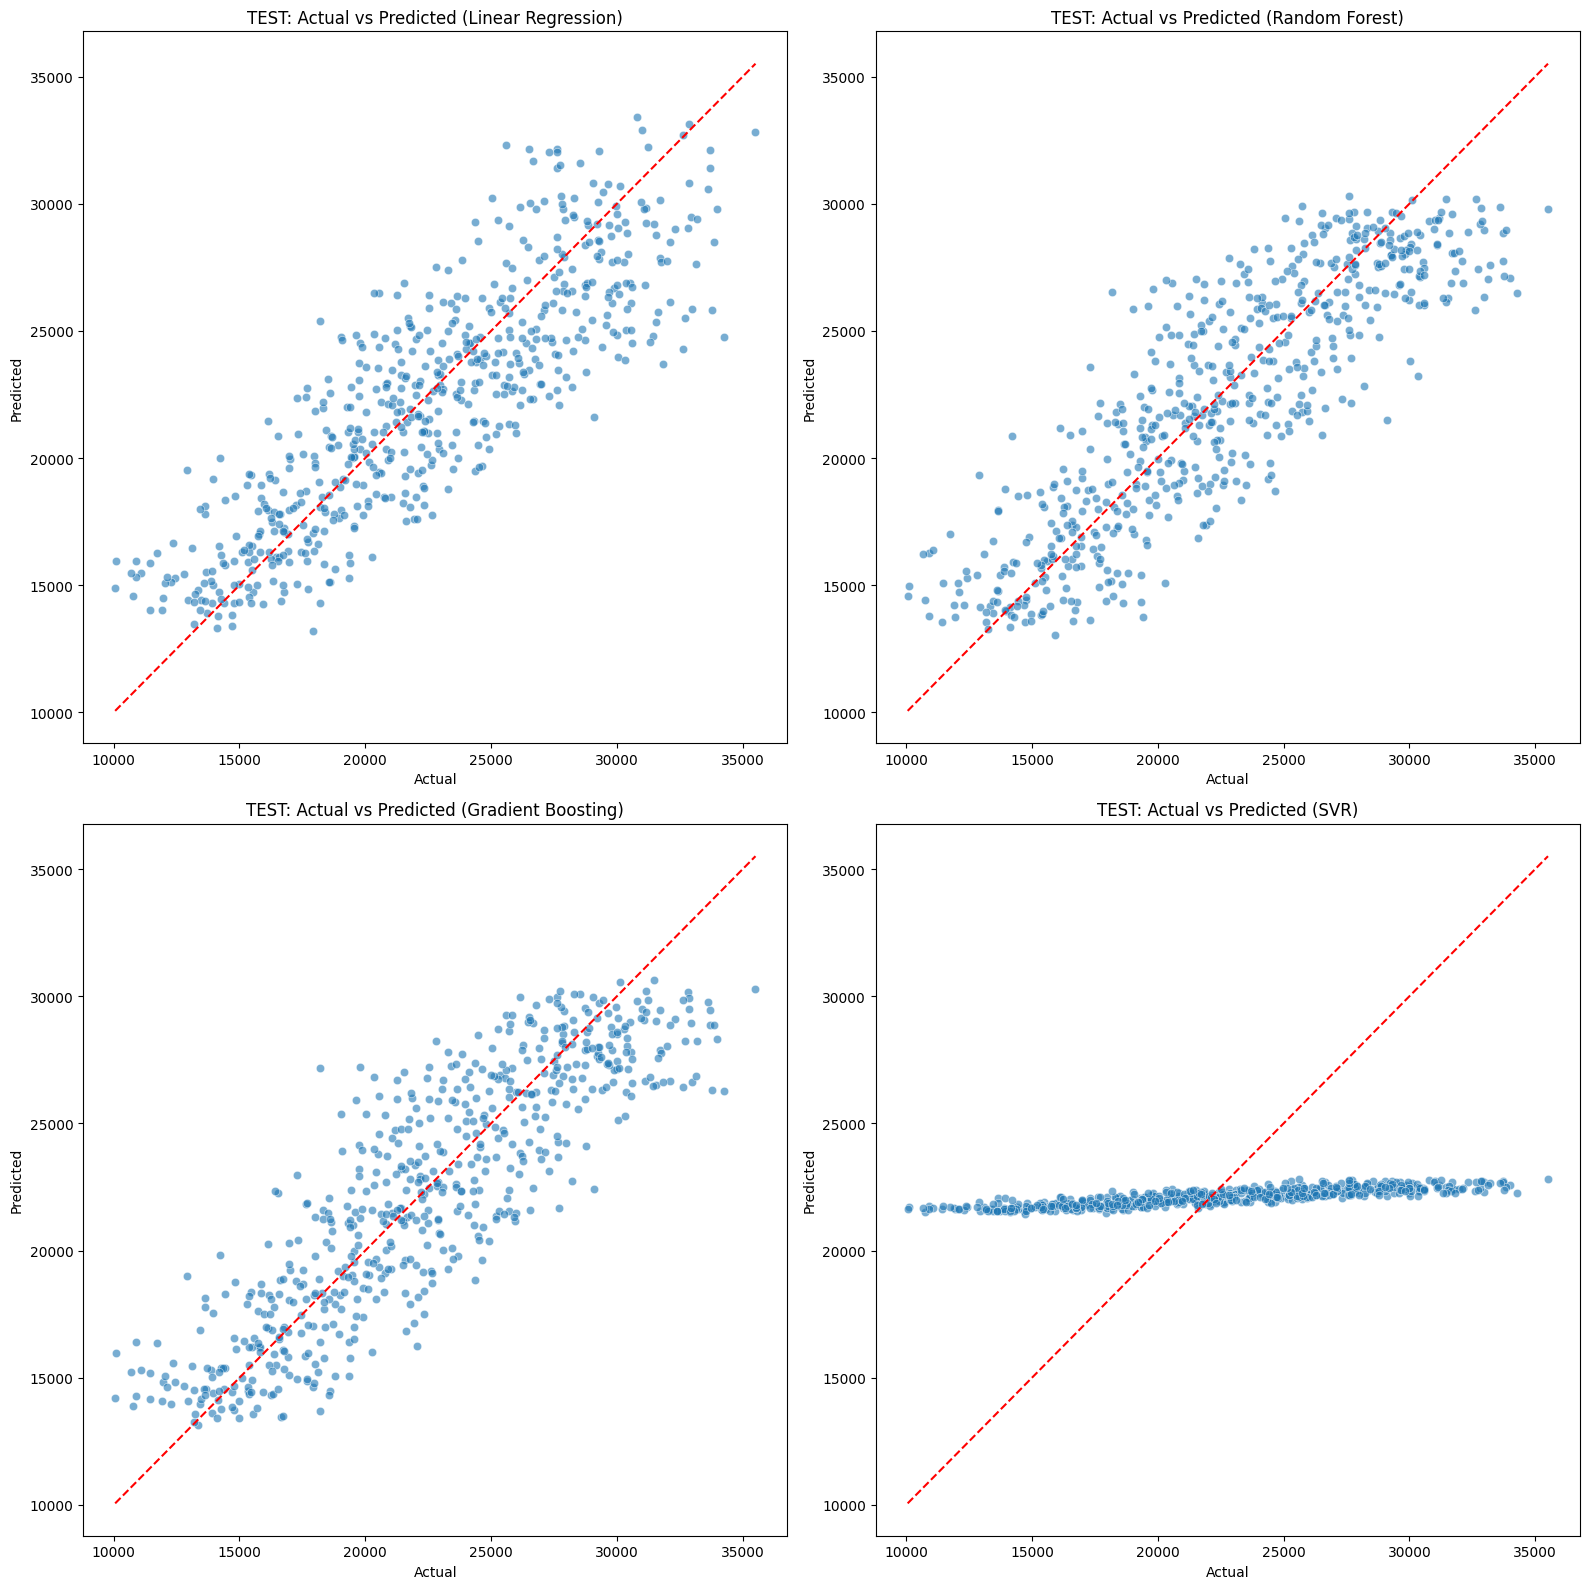


 Best Model (Test RMSE): Gradient Boosting


In [26]:

# STEP 8 → FOUR-MODEL PIPELINE WITH TUNING, PLOTS & TABLES


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Define target & features
TARGET = "Resale_Value_USD"

drop_cols = ["Resale_Value_USD", "Maintenance_Cost_USD","Battery_Capacity_kWh"]
drop_cols = [c for c in drop_cols if c in df.columns]

X = df.drop(columns=drop_cols)
y = df[TARGET]

# 2. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Unified preprocessing
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

# 4. Models + hyperparameters
models_with_params = {
    "Linear Regression": {
        "model": LinearRegression(),
        "param_grid": None
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "param_grid": {
            "model__n_estimators": [100, 300],
            "model__max_depth": [None, 10, 20],
            "model__min_samples_split": [2, 5]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "param_grid": {
            "model__n_estimators": [100, 300],
            "model__learning_rate": [0.05, 0.1],
            "model__max_depth": [3, 5]
        }
    },
    "SVR": {
        "model": SVR(),
        "param_grid": {
            "model__kernel": ["rbf"],
            "model__C": [1, 10],
            "model__epsilon": [0.1, 0.2],
            "model__gamma": ["scale", "auto"]
        }
    }
}

# Store results
train_results = []
test_results = []

train_predictions = {}
test_predictions = {}

# 5. Training loop
for name, cfg in models_with_params.items():
    base_model = cfg["model"]
    param_grid = cfg["param_grid"]

    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", base_model)
    ])

    if param_grid:
        grid = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            cv=3,
            scoring="neg_root_mean_squared_error",
            n_jobs=-1,
            verbose=0
        )
        grid.fit(X_train, y_train)
        best_pipe = grid.best_estimator_
    else:
        best_pipe = pipe.fit(X_train, y_train)

    # Predictions
    y_train_pred = best_pipe.predict(X_train)
    y_test_pred = best_pipe.predict(X_test)

    train_predictions[name] = y_train_pred
    test_predictions[name] = y_test_pred

    # ============== TRAIN METRICS ==============
    train_results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_train, y_train_pred),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "R² Score": r2_score(y_train, y_train_pred)
    })

    # ============== TEST METRICS ==============
    test_results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "R² Score": r2_score(y_test, y_test_pred)
    })

# 6A. TRAIN PERFORMANCE TABLE
train_df = pd.DataFrame(train_results).sort_values("RMSE")
print("\n TRAIN PERFORMANCE COMPARISON:")
display(train_df)

# 6B. TEST PERFORMANCE TABLE
test_df = pd.DataFrame(test_results).sort_values("RMSE")
print("\n TEST PERFORMANCE COMPARISON:")
display(test_df)

# Identify best model based on test RMSE
best_model_name = test_df.iloc[0]["Model"]
print(f"\n Best Model (Test RMSE): {best_model_name}")


# 7. PLOTS: Train & Test Actual vs Predicted for All Models


# Train plots
plt.figure(figsize=(16, 16))
for i, (name, y_pred) in enumerate(train_predictions.items(), start=1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=y_train, y=y_pred, alpha=0.6)
    low, high = min(y_train.min(), y_pred.min()), max(y_train.max(), y_pred.max())
    plt.plot([low, high], [low, high], 'r--')
    plt.title(f"TRAIN: Actual vs Predicted ({name})")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

# Test plots
plt.figure(figsize=(16, 16))
for i, (name, y_pred) in enumerate(test_predictions.items(), start=1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    low, high = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
    plt.plot([low, high], [low, high], 'r--')
    plt.title(f"TEST: Actual vs Predicted ({name})")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
plt.tight_layout()
plt.show()
print(f"\n Best Model (Test RMSE): {best_model_name}")



In [29]:
# ==========================================
# TRAIN • Europe • Hatchback • Year >= 2020
# Top-3 OEMs & Top-3 Models • 15-row sample with GB predictions

# ==========================================
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

# --- sanity: needs df/X/y/X_train/y_train from your Step-8 cell ---
assert all(k in globals() for k in ["df", "X", "y", "X_train", "y_train"]), \
    "Run your Step-8 training cell first."

# --- 1) GB pipeline tuned on TRAIN only (re-uses your Step-8 feature lists) ---
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

preprocessor_gb = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

gb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor_gb),
    ("model", GradientBoostingRegressor(random_state=42))
])

gb_param_grid = {
    "model__n_estimators": [100, 300],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [3, 5]
}

gb_grid = GridSearchCV(
    estimator=gb_pipe,
    param_grid=gb_param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=0
)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

# --- 2) TRAIN subset rows only ---
train_df = df.loc[X_train.index].copy()

required_cols = {"Region", "Vehicle_Type", "Year", "Make", "Model"}
missing = required_cols - set(train_df.columns)
if missing:
    raise ValueError(f"Missing required columns in df: {missing}")

# --- 3) Clean Year -> Year4 (4-digit) for filtering/sorting (doesn't touch original df) ---
yr_dt = pd.to_datetime(train_df["Year"], errors="coerce").dt.year
yr_num = pd.to_numeric(train_df["Year"], errors="coerce")
train_df["Year4"] = yr_dt.fillna(yr_num).round().astype("Int64")

# --- 4) Apply filters: Region==Europe, Vehicle_Type==Hatchback (case-insensitive), Year >= 2020 ---
region_mask = train_df["Region"].astype(str).str.strip().str.casefold() == "europe"
vt_mask     = train_df["Vehicle_Type"].astype(str).str.strip().str.casefold() == "hatchback"
yr_mask     = train_df["Year4"].notna() & (train_df["Year4"] >= 2020)

filtered_base = train_df.loc[region_mask & vt_mask & yr_mask].copy()
if filtered_base.empty:
    raise ValueError("No TRAIN rows after applying filters: Europe + Hatchback + Year>=2020.")

# --- 5) Top-3 OEMs & Top-3 Models within the filtered TRAIN slice ---
top_oems_train = filtered_base["Make"].value_counts().head(3).index.tolist()
top_oem_models_train = {
    oem: filtered_base.loc[filtered_base["Make"] == oem, "Model"].value_counts().head(3).index.tolist()
    for oem in top_oems_train
}

print("Top 3 OEMs in TRAIN (Europe • Hatchback • Year>=2020):", top_oems_train)
for oem, models in top_oem_models_train.items():
    print(f"  • {oem}: {list(models)}")

# --- 6) Filter to those Top-3 OEMs & models ---
mask = pd.Series(False, index=filtered_base.index)
for oem, models in top_oem_models_train.items():
    mask |= (filtered_base["Make"] == oem) & (filtered_base["Model"].isin(models))
filtered_train = filtered_base.loc[mask].copy()
if filtered_train.empty:
    raise ValueError("No rows for the selected Top-3 OEMs & their Top-3 models after filters.")

# --- 7) Predict resale on filtered rows (no imputation: predict only where all features exist) ---
feature_cols = X.columns.tolist()  # same features used in Step-8
predict_mask = filtered_train[feature_cols].notna().all(axis=1)
filtered_train["Predicted_Resale_Value"] = np.nan
if predict_mask.any():
    filtered_train.loc[predict_mask, "Predicted_Resale_Value"] = best_gb.predict(
        filtered_train.loc[predict_mask, feature_cols]
    )

# --- 8) Maintenance model: reuse if available, else train GB on TRAIN (same features) ---
TARGET_M = "Maintenance_Cost_USD"
if "best_maint_model" in globals():
    maint_model = best_maint_model
else:
    # Train a GB on TRAIN for maintenance using the same preprocessor/features
    if TARGET_M not in df.columns:
        # If the column isn't present, just create the column of NaN so table shape is stable
        maint_model = None
    else:
        y_train_full = df.loc[X_train.index, TARGET_M]
        # strict mask: features complete + target present on TRAIN
        m_mask = X_train.notna().all(axis=1) & y_train_full.notna()
        if m_mask.any():
            gb_pipe_m = Pipeline(steps=[
                ("preprocess", preprocessor_gb),
                ("model", GradientBoostingRegressor(
                    n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42
                ))
            ])
            gb_pipe_m.fit(X_train.loc[m_mask], y_train_full.loc[m_mask])
            maint_model = gb_pipe_m
        else:
            maint_model = None  # no trainable rows

# Predict maintenance where possible
filtered_train["Predicted_Maintenance_Cost"] = np.nan
if maint_model is not None and predict_mask.any():
    # Only predict where features are complete
    filtered_train.loc[predict_mask, "Predicted_Maintenance_Cost"] = maint_model.predict(
        filtered_train.loc[predict_mask, feature_cols]
    )

# --- 9) Tidy Year to 4 digits in the output (optional cosmetic) ---
filtered_train["Year"] = filtered_train["Year4"]
filtered_train.drop(columns=["Year4"], inplace=True)

# --- 10) Print EXACTLY 15 rows with ALL columns + predictions ---
sort_cols = [c for c in ["Make", "Model", "Year"] if c in filtered_train.columns]
if sort_cols:
    filtered_train = filtered_train.sort_values(by=sort_cols)

print("\n=== Sample (15 rows) — TRAIN • Europe • Hatchback • Year>=2020 • Top-3 OEMs & Models — ALL columns + Predicted_Resale_Value  ===")
display(filtered_train.head(15))




Top 3 OEMs in TRAIN (Europe • Hatchback • Year>=2020): ['Ford', 'Mercedes', 'BMW']
  • Ford: ['Mustang Mach-E', 'F-150 Lightning']
  • Mercedes: ['EQC', 'EQS']
  • BMW: ['i3', 'i4', 'iX']

=== Sample (15 rows) — TRAIN • Europe • Hatchback • Year>=2020 • Top-3 OEMs & Models — ALL columns + Predicted_Resale_Value  ===


,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD,Predicted_Resale_Value,Predicted_Maintenance_Cost
123,124,BMW,i3,2020,Europe,Hatchback,81.0,81.7,405,105.9,...,29.5,Commercial,23.60,1147,2049,0.10,277.84,26635,24359.335177,988.346630
2800,2801,BMW,i3,2020,Europe,Hatchback,32.0,86.0,177,67.9,...,29.2,Personal,24.11,271,1920,0.19,635.40,16482,14944.978695,912.708448
791,792,BMW,i3,2023,Europe,Hatchback,88.6,77.8,366,109.8,...,28.6,Commercial,2.55,1050,2482,0.25,65.43,28230,23681.765373,1137.061466
2697,2698,BMW,i3,2024,Europe,Hatchback,62.4,91.8,355,115.3,...,32.8,Commercial,13.30,1691,860,0.23,284.36,22967,21689.209133,1193.418865
2623,2624,BMW,i4,2023,Europe,Hatchback,60.8,93.0,260,233.3,...,23.6,Personal,5.85,896,911,0.28,221.35,21206,18263.772305,1026.826660
2461,2462,BMW,i4,2023,Europe,Hatchback,100.5,79.8,431,72.4,...,25.3,Fleet,9.58,827,1784,0.13,162.91,27720,26117.497153,874.974005
2141,2142,BMW,i4,2023,Europe,Hatchback,81.4,82.8,364,240.5,...,26.0,Fleet,22.98,1208,1716,0.21,468.49,24925,23322.480675,788.631595
2403,2404,BMW,iX,2022,Europe,Hatchback,101.5,92.0,443,145.9,...,2.1,Personal,8.54,507,733,0.21,195.69,30896,27972.171863,1106.075833
19,20,BMW,iX,2024,Europe,Hatchback,114.3,90.9,587,34.2,...,32.4,Fleet,7.43,1616,2334,0.27,232.25,29880,29658.319689,1095.883333
648,649,BMW,iX,2024,Europe,Hatchback,55.6,75.3,305,71.2,...,19.5,Personal,21.22,1187,1302,0.19,693.41,18680,19393.754613,982.435731
